In [1]:
#Useful libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Database acquisition
fashion_mnist = tf.keras.datasets.fashion_mnist

#Data separation into images and labels for training set and test set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#No more than one label is assigned to every single image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Rescaling the data. Images colors are store in a 0-to-255 value range, whereas we need them to be 0-to-1 to work with this code
train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


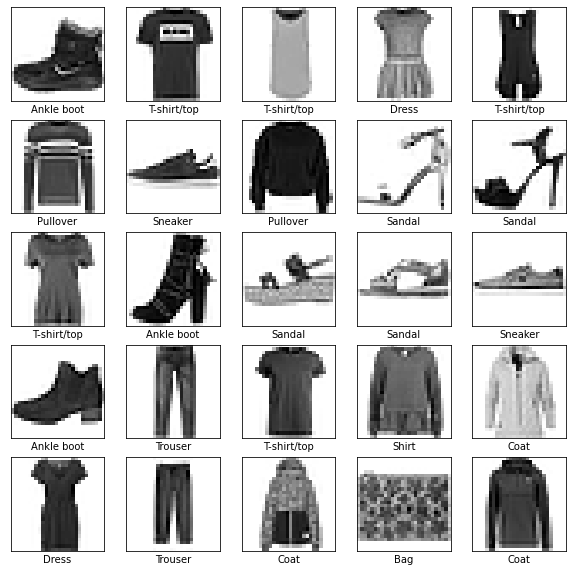

In [2]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [3]:
#Creating our model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #This turns every 28x28 square images in a sequence of 28x28 = 784 pixels
    tf.keras.layers.Dense(128, kernel_initializer = "random_uniform")
])

In [4]:
#Packing everything together
model.compile(optimizer='adam', #The method to determine how the net adjusts to results
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #The loss function
              metrics=['accuracy'])

#Let's see our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [5]:
#Training time!
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6159 - accuracy: 0.7989
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4606 - accuracy: 0.8425
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4352 - accuracy: 0.8493
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4218 - accuracy: 0.8555
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4124 - accuracy: 0.8557
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4068 - accuracy: 0.8603
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4026 - accuracy: 0.8606
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3982 - accuracy: 0.8609
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3948 - accuracy: 0.8625
Epoch 10/10
60

In [6]:
#Testing the trained model
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.4435 - accuracy: 0.8439


In [7]:
print(test_loss, test_acc)

0.44350858726501463 0.8439


In [8]:
y_pred = model.predict(test_images)

In [11]:
y_pred_labels = [np.argmax(x) for x in y_pred]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
print(classification_report(test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.74      0.72      0.73      1000
           3       0.86      0.83      0.85      1000
           4       0.75      0.75      0.75      1000
           5       0.92      0.95      0.93      1000
           6       0.59      0.62      0.60      1000
           7       0.94      0.90      0.92      1000
           8       0.96      0.93      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



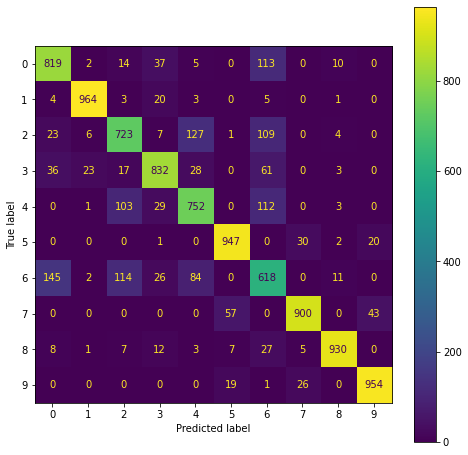

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, y_pred_labels))
disp.plot(ax=ax)
plt.show()

In [19]:
for x in set(test_labels):
    print(x, class_names[x])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
#Le ultime 2 celle possono essere rieseguite a oltranza per proseguire l'addestramento fino all'overfit